## Domain knowledge discretization

* Definition 
  * The business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business.e.g. Age or Income

# Prepare Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/house_price/train.csv' , index_col='Id')

In [3]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
df.select_dtypes('number').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
# pick column to experiment
col = 'YearBuilt'

# Split data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[col].to_frame(), 
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

# Check data

<AxesSubplot:ylabel='Frequency'>

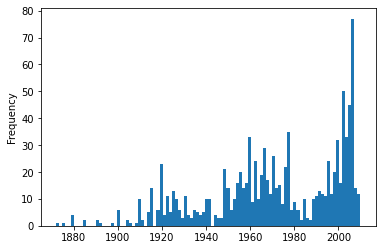

In [7]:
X_train[col].plot.hist(bins=100)

In [8]:
X_train[col].min(), X_train[col].max()

(1872, 2010)

# Define buckets and labels

In [9]:
buckets = [1860, 1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = ['1860-1900', '1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '>2000']

buckets, labels

([1860, 1900, 1920, 1940, 1960, 1980, 2000, 2020],
 ['1860-1900',
  '1900-1920',
  '1920-1940',
  '1940-1960',
  '1960-1980',
  '1980-2000',
  '>2000'])

# Discretization

In [10]:
X_train[col + '_buckets_labels'] = pd.cut(X_train[col], bins=buckets, labels=labels, include_lowest=True)
X_test[col + '_buckets_labels'] = pd.cut(X_test[col], bins=buckets, labels=labels, include_lowest=True)

In [11]:
X_train

,YearBuilt,YearBuilt_buckets_labels
Id,,
65,1997,1980-2000
683,1996,1980-2000
961,1958,1940-1960
1385,1939,1920-1940
1101,1920,1900-1920
...,...,...
764,1999,1980-2000
836,1950,1940-1960
1217,1978,1960-1980


<AxesSubplot:xlabel='YearBuilt_buckets_labels'>

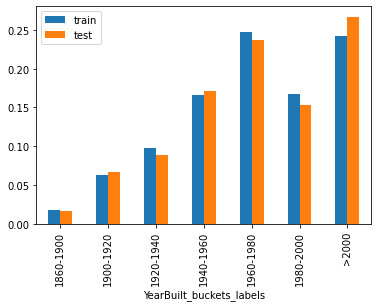

In [14]:
temp = pd.concat([X_train.groupby([col+'_buckets_labels'])[col].count()/len(X_train), 
                  X_test.groupby([col+'_buckets_labels'])[col].count()/len(X_test)], 
                 axis=1, keys=['train', 'test'])

temp.plot.bar()